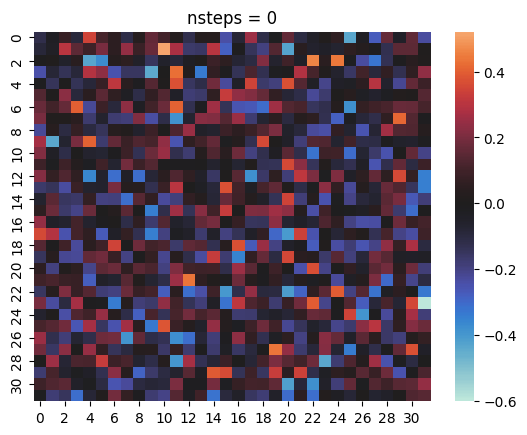

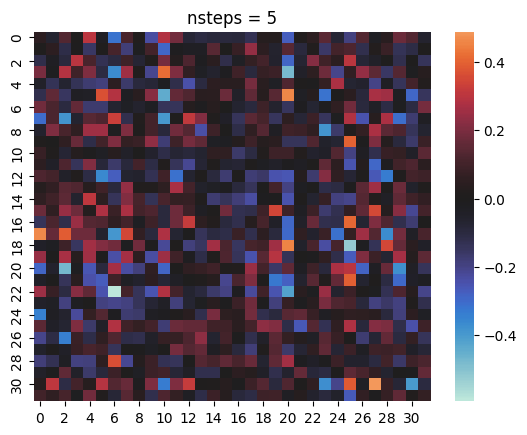

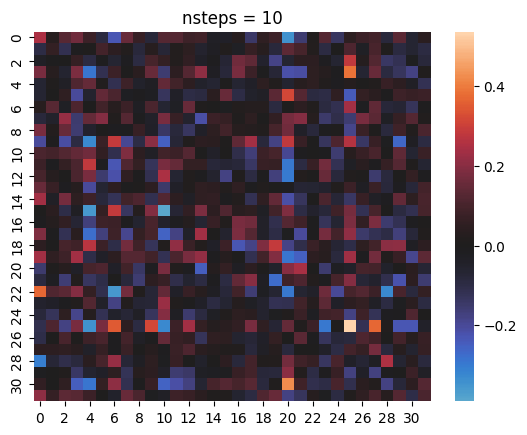

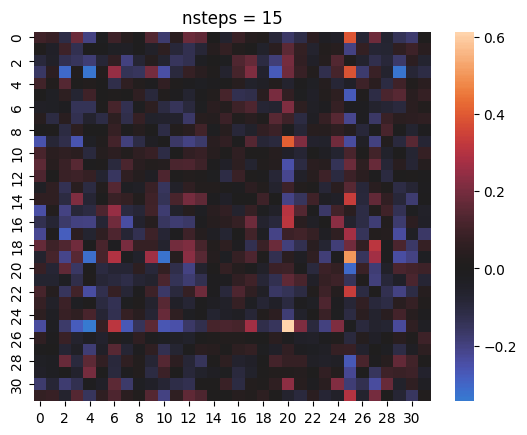

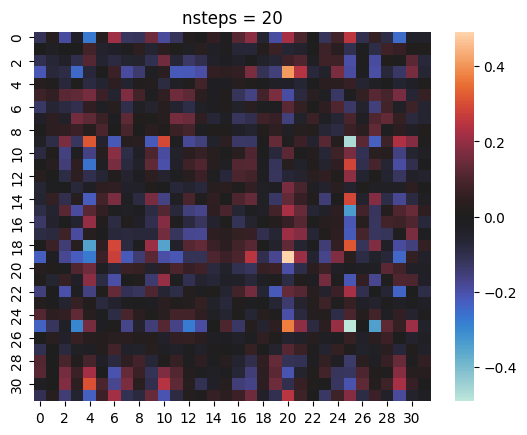

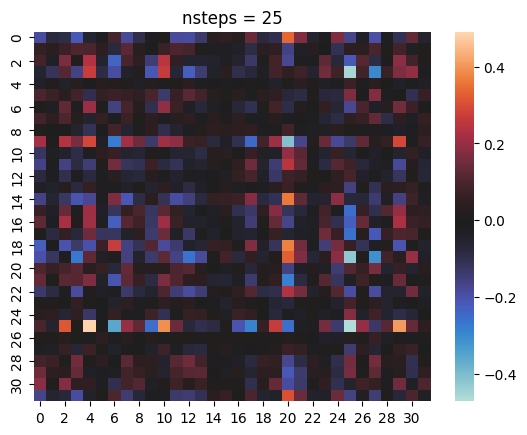

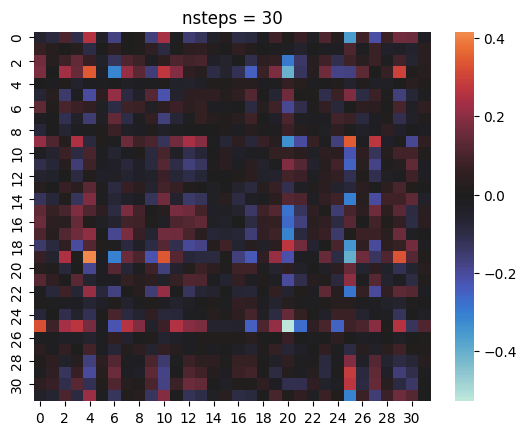

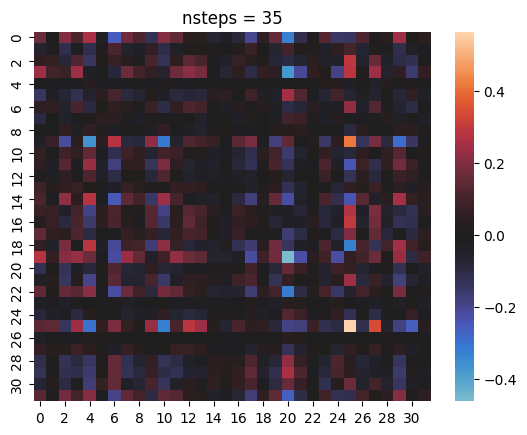

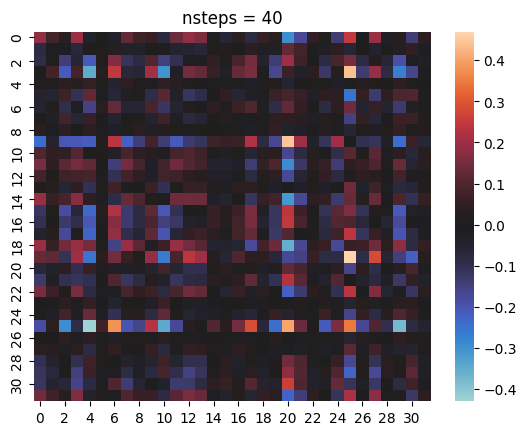

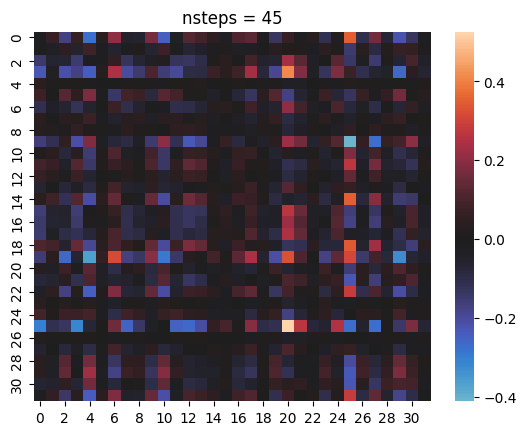

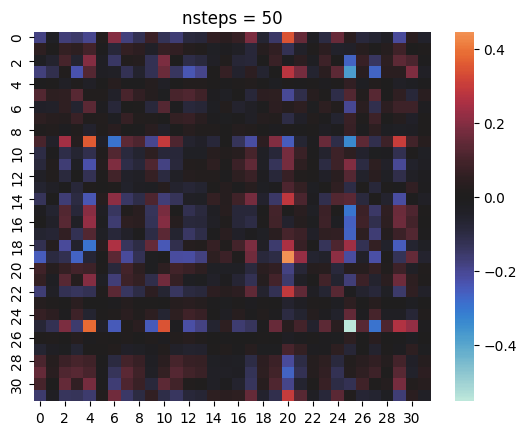

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dim = 32

mlp = torch.nn.Linear(dim, dim, bias=False)

vec = torch.randn(dim).detach()

w = torch.randn([dim, dim]) / np.sqrt(dim)
w = w.to("cuda")
wi = w.clone()
with torch.no_grad():
    for i in range(0, 51):
        if (i%5 == 0):
            plt.figure()
            sns.heatmap(wi.cpu(), center=0)
            plt.title("nsteps = " + str(i))
        wi = w @ wi


In [3]:
from taker import Model

m = Model()

- Loaded nickypro/tinyllama-15m
 - Registered 6 Attention Layers


<Axes: >

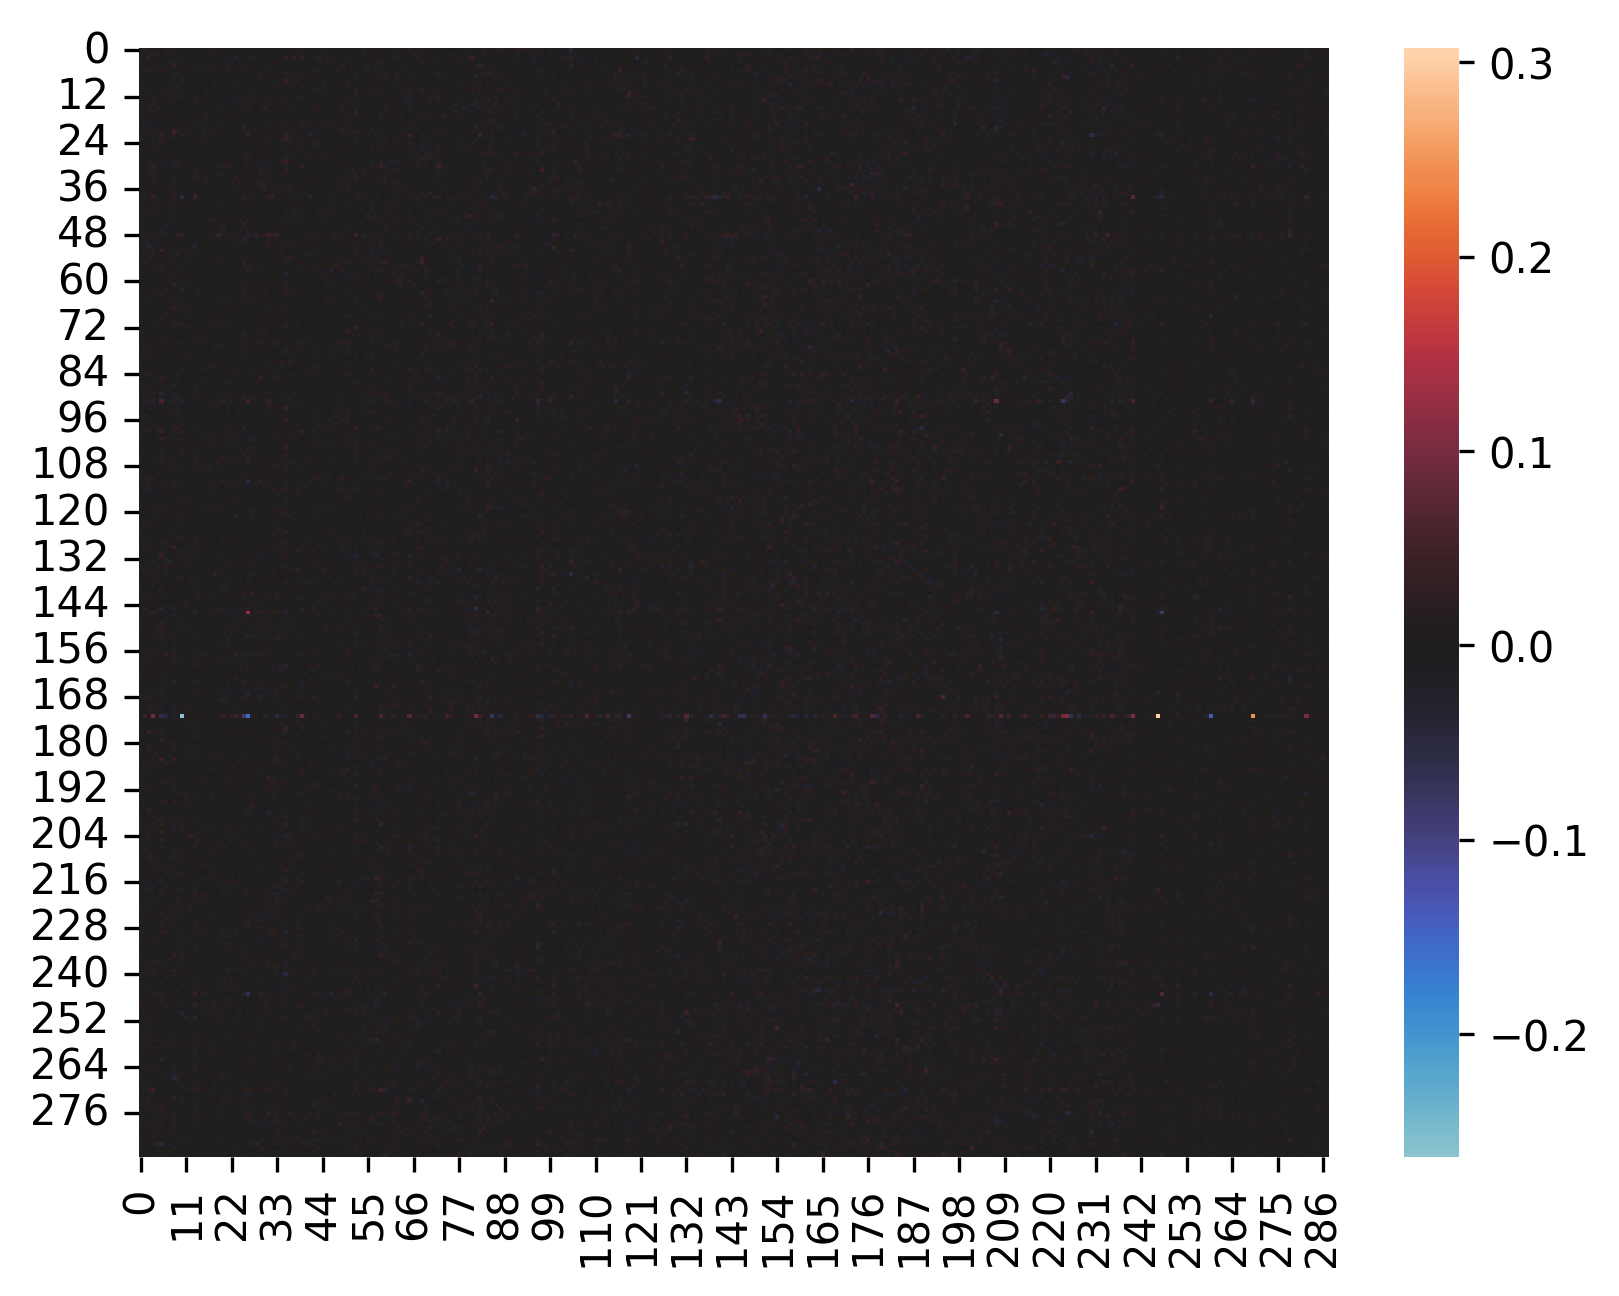

In [9]:
w0 = m.layers[0]["attn.W_O"]

sns.heatmap(w0.detach().cpu(), center=0)

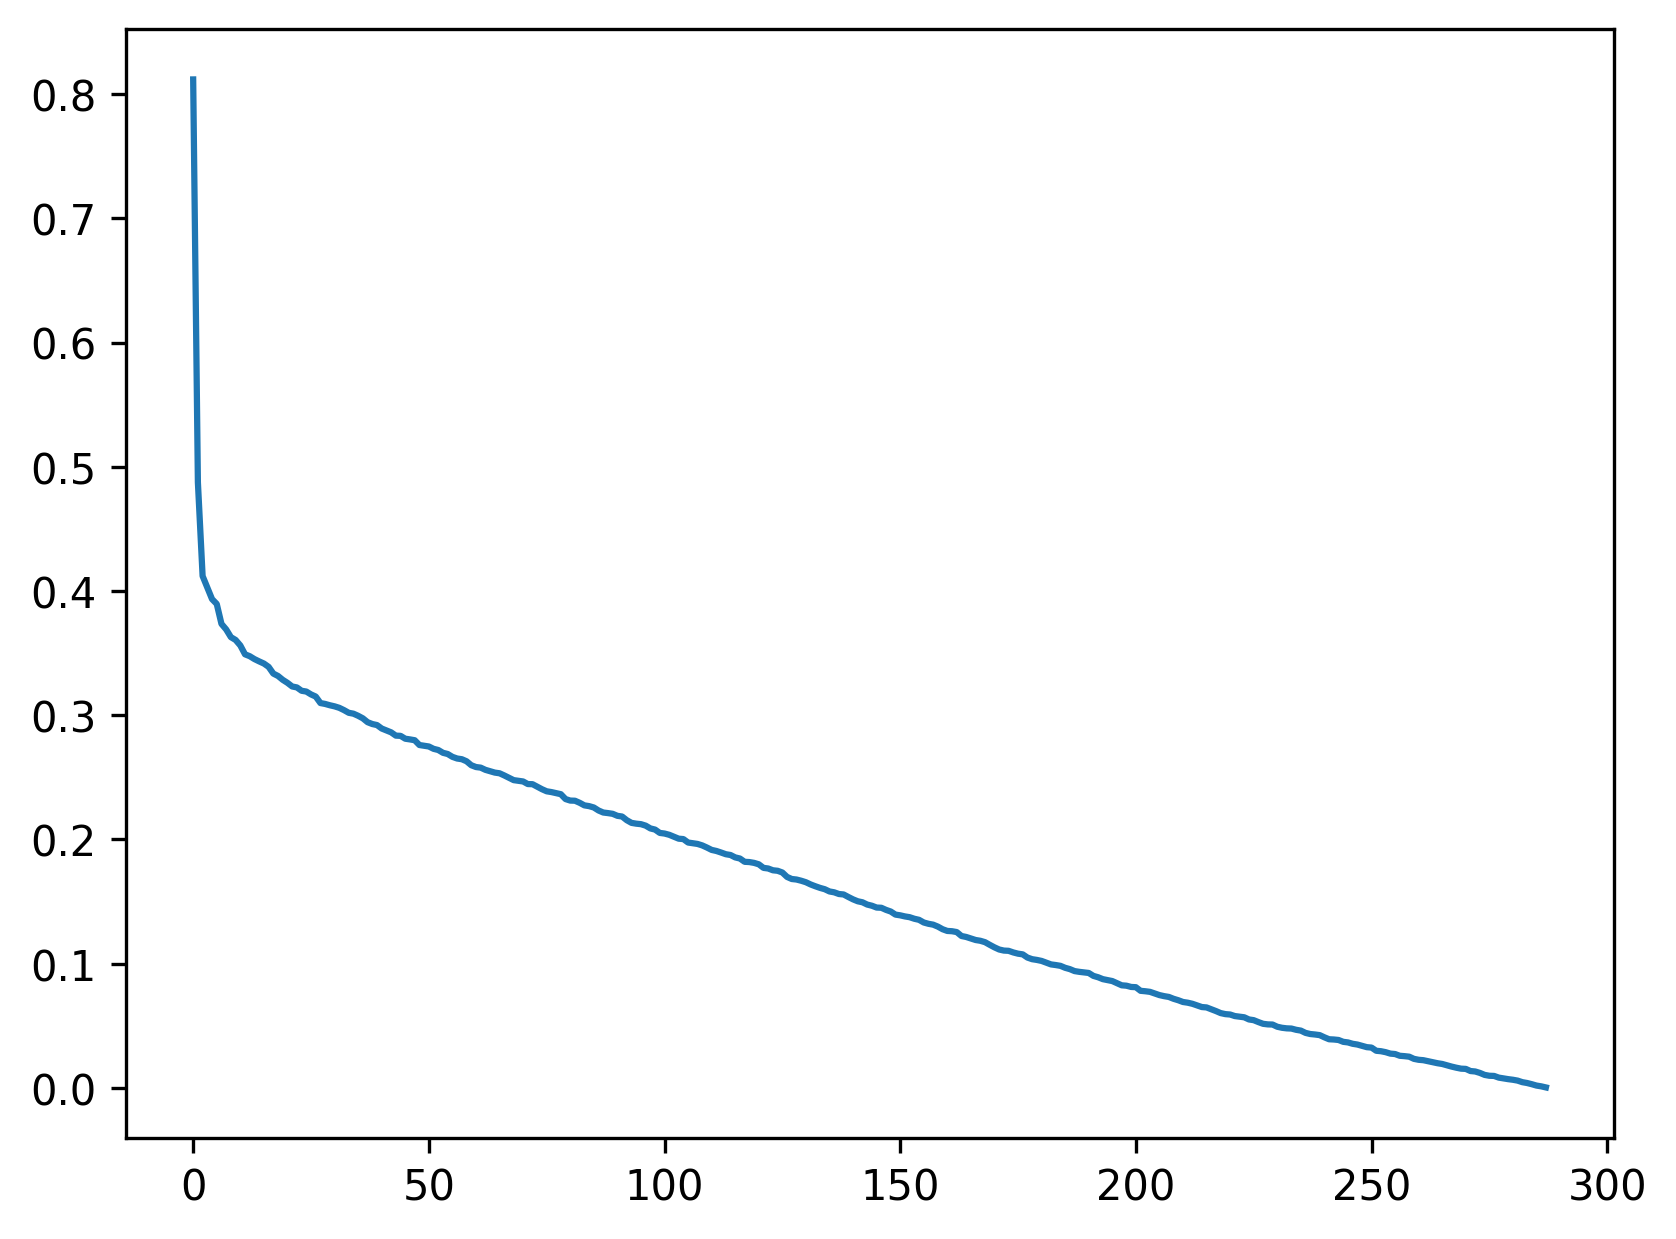

In [11]:
import numpy as np

w0 = m.layers[0]["attn.W_O"]
U,S,V = np.linalg.svd( w0.detach().cpu().to(dtype=torch.float32) )

plt.plot(S)


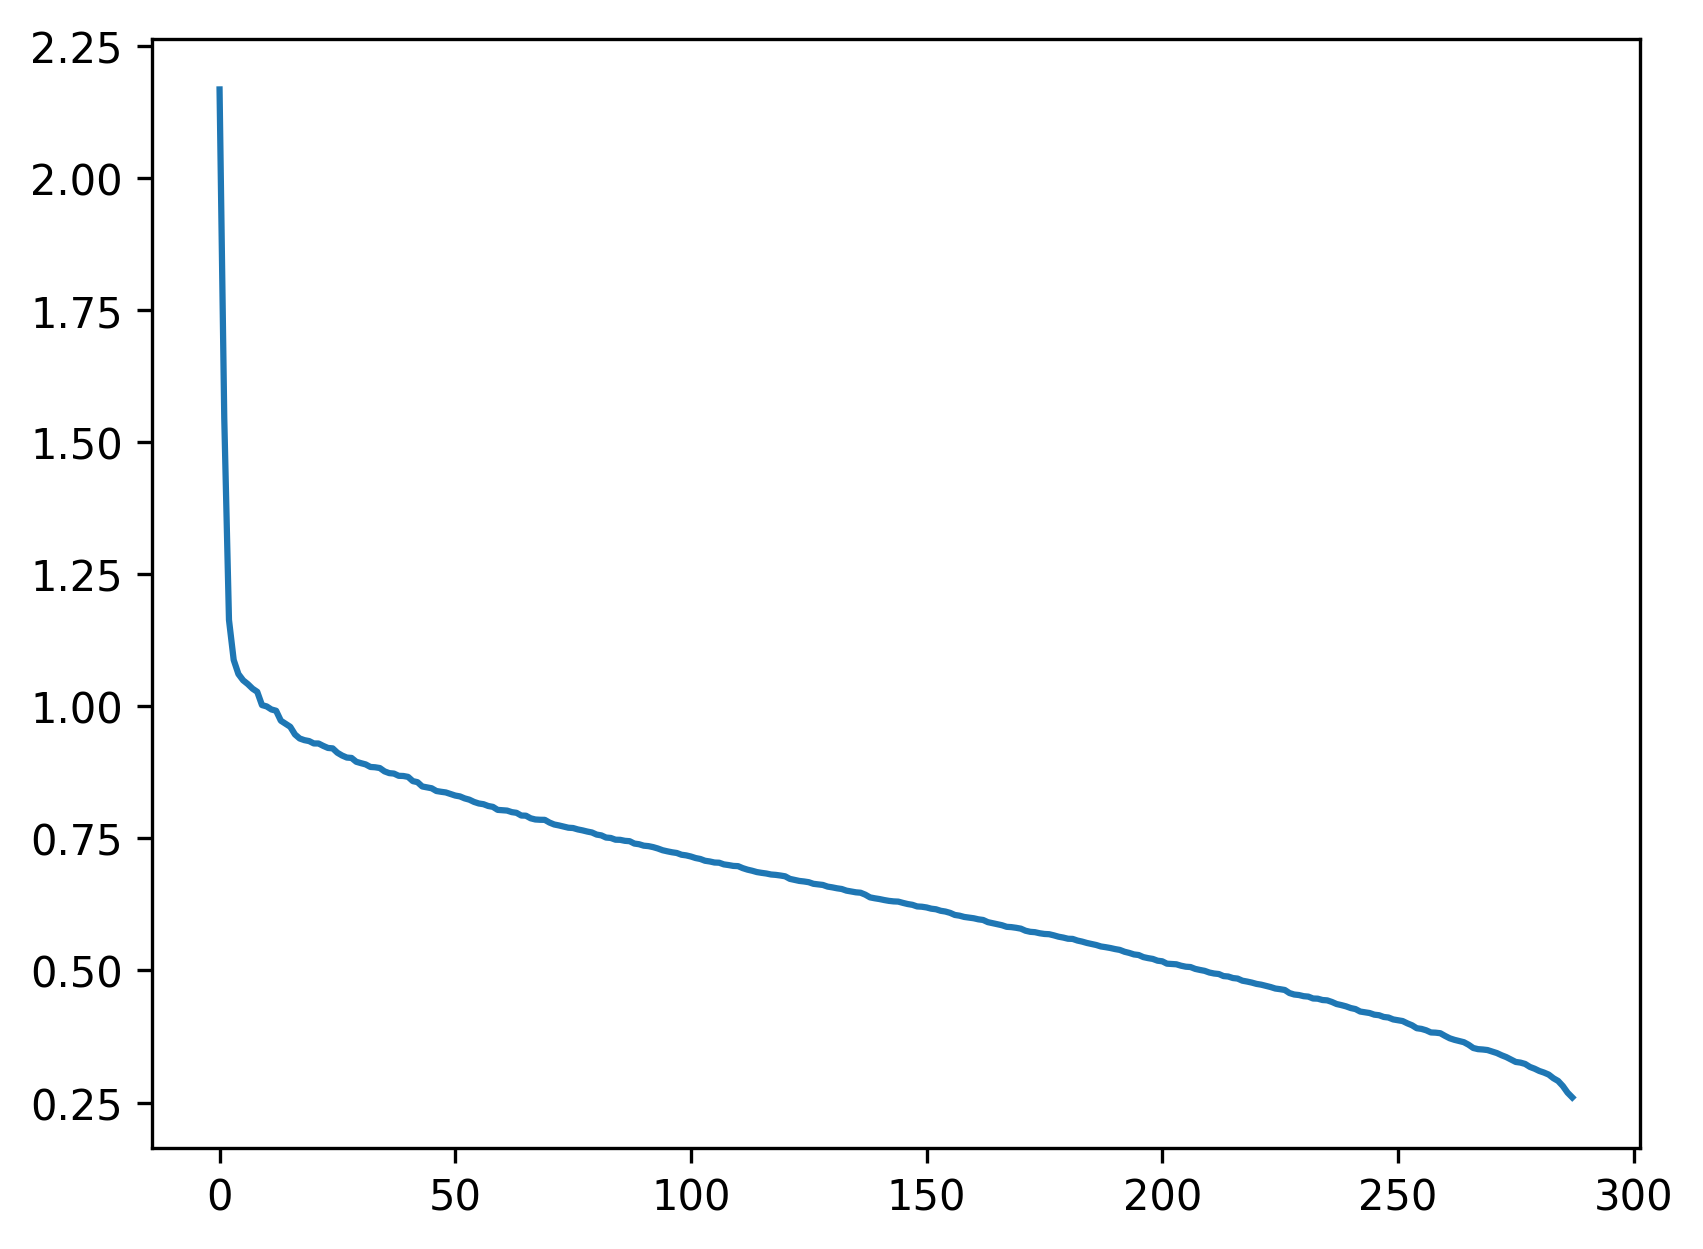

In [14]:

w0 = m.layers[0]["mlp.W_out"]
U,S,V = np.linalg.svd( w0.detach().cpu().to(dtype=torch.float32) )

plt.plot(S)

In [ ]:
U,S,V = np.linalg.svd( w.detach().cpu().to(dtype=torch.float32) )

plt.plot(S)